In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [6]:
a=pd.read_csv('StressLevelDataset.csv') 
a

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [7]:
a.value_counts('stress_level')

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

### Preprocessing

In [8]:
a.shape

(1100, 21)

In [9]:
a.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [11]:
a.size

23100

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [13]:
a.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [14]:
a.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [16]:
a.duplicated().sum()

np.int64(0)

### EDA (Exploratory Data Analysis)

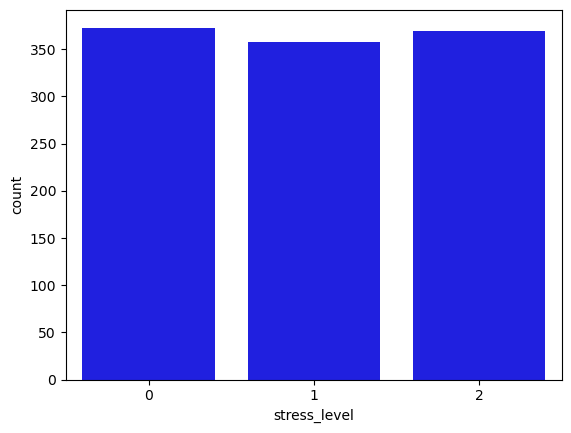

<Figure size 640x480 with 0 Axes>

In [25]:
sns.countplot(data=a,x='stress_level',color='blue')
plt.show()
plt.savefig('count plot of stress_level.png')


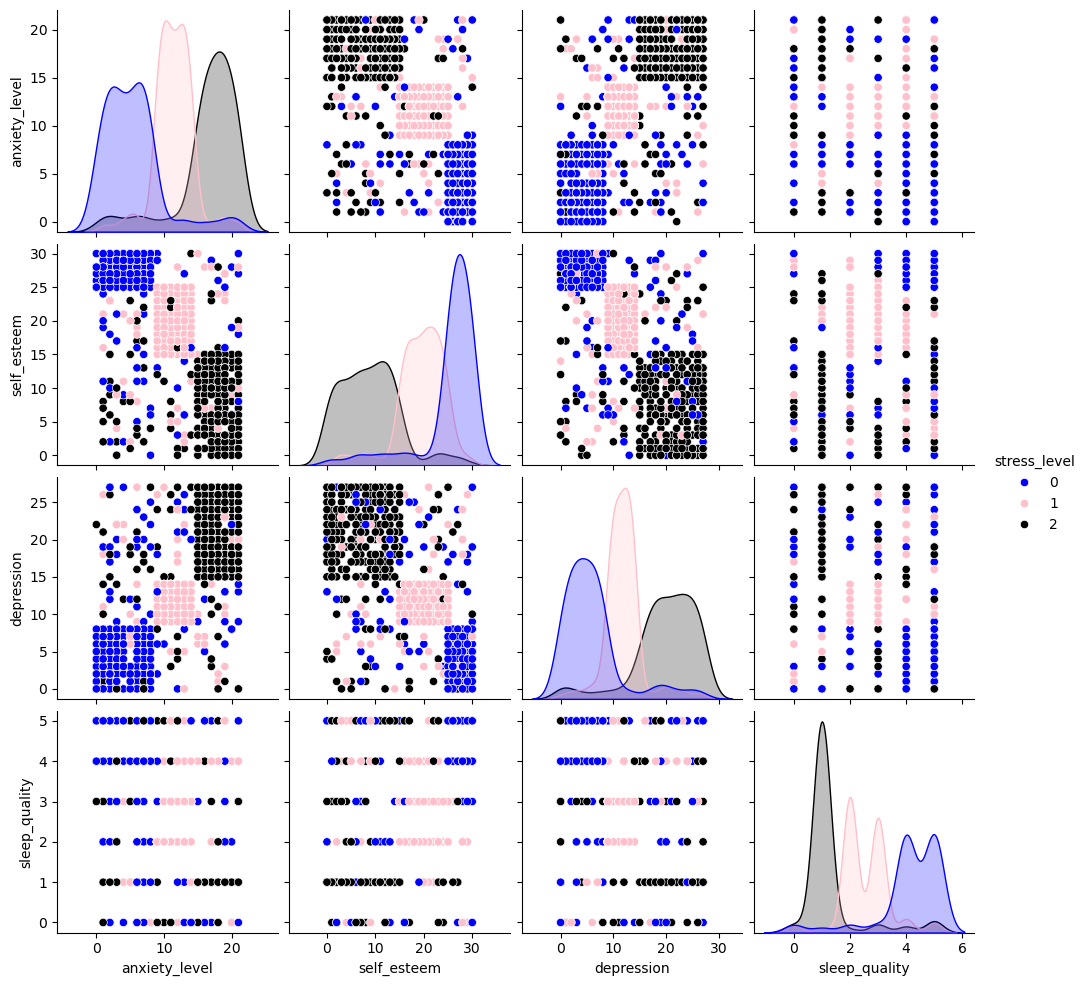

In [20]:
sns.pairplot(a[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'stress_level']], 
             hue='stress_level',
             palette={0: 'blue', 1: 'pink', 2: 'black'})
plt.show()

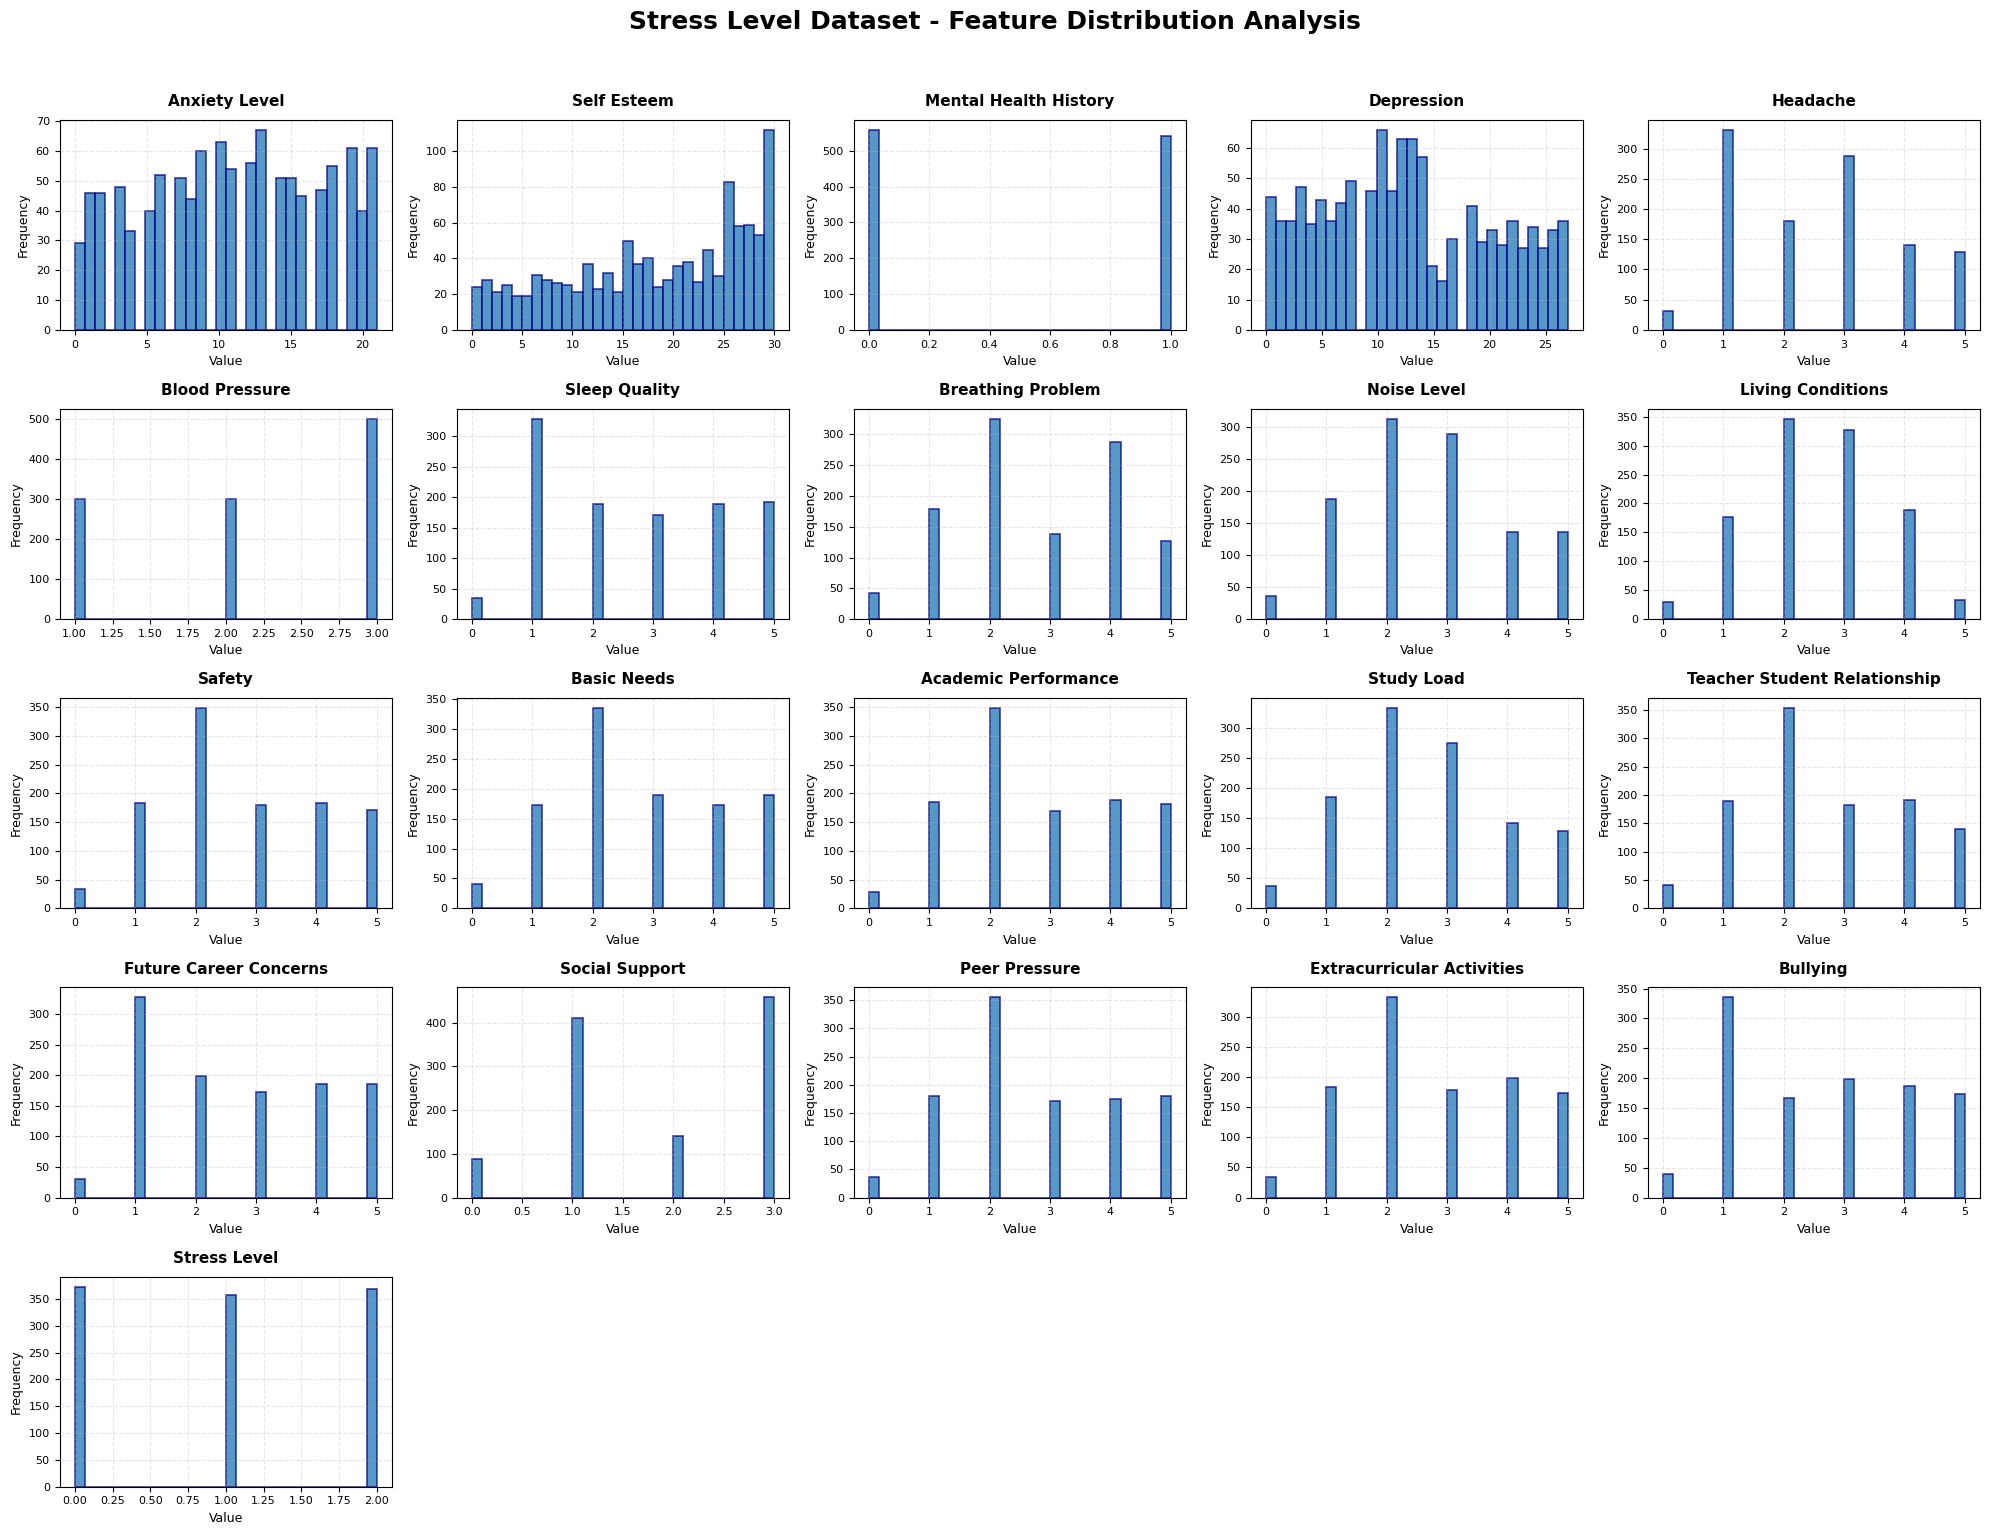

In [31]:
stress_cols = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 
               'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 
               'noise_level', 'living_conditions', 'safety', 'basic_needs', 
               'academic_performance', 'study_load', 'teacher_student_relationship', 
               'future_career_concerns', 'social_support', 'peer_pressure', 
               'extracurricular_activities', 'bullying', 'stress_level']

plt.figure(figsize=(20, 15), layout='constrained')
plt.suptitle('Stress Level Dataset - Feature Distribution Analysis', 
             fontsize=18, fontweight='bold', y=1.02)

n_cols = 5
n_rows = 5

for i in range(len(stress_cols)):
    plt.subplot(n_rows, n_cols, i + 1)
    
    plt.hist(a[stress_cols[i]], bins=30, alpha=0.75, edgecolor='darkblue', 
             color='#1f77b4', linewidth=1.2)
    

    feature_name = stress_cols[i].replace("_", " ").title()
    plt.title(feature_name, fontsize=11, fontweight='semibold', pad=10)
    plt.xlabel('Value', fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

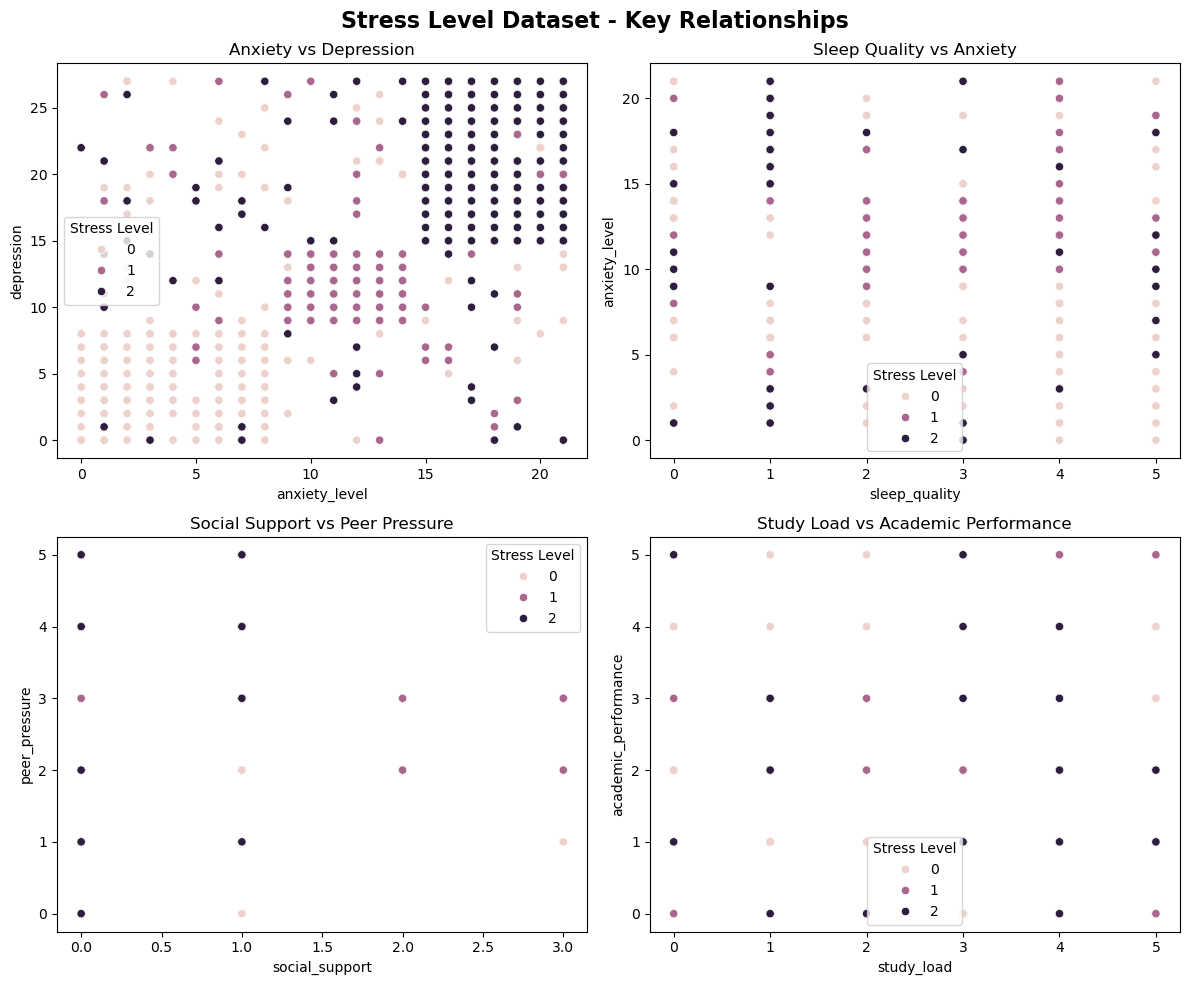

In [34]:
# Create a 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Anxiety vs Depression
sns.scatterplot(data=a, x='anxiety_level', y='depression', hue='stress_level', ax=axes[0,0])
axes[0,0].set_title('Anxiety vs Depression')
axes[0,0].legend(title='Stress Level')

# Plot 2: Sleep Quality vs Anxiety
sns.scatterplot(data=a, x='sleep_quality', y='anxiety_level', hue='stress_level', ax=axes[0,1])
axes[0,1].set_title('Sleep Quality vs Anxiety')
axes[0,1].legend(title='Stress Level')

# Plot 3: Social Support vs Peer Pressure
sns.scatterplot(data=a, x='social_support', y='peer_pressure', hue='stress_level', ax=axes[1,0])
axes[1,0].set_title('Social Support vs Peer Pressure')
axes[1,0].legend(title='Stress Level')

# Plot 4: Study Load vs Academic Performance
sns.scatterplot(data=a, x='study_load', y='academic_performance', hue='stress_level', ax=axes[1,1])
axes[1,1].set_title('Study Load vs Academic Performance')
axes[1,1].legend(title='Stress Level')

plt.suptitle('Stress Level Dataset - Key Relationships', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('multiple_scatter_plots_stress_analysis.png')
plt.show()

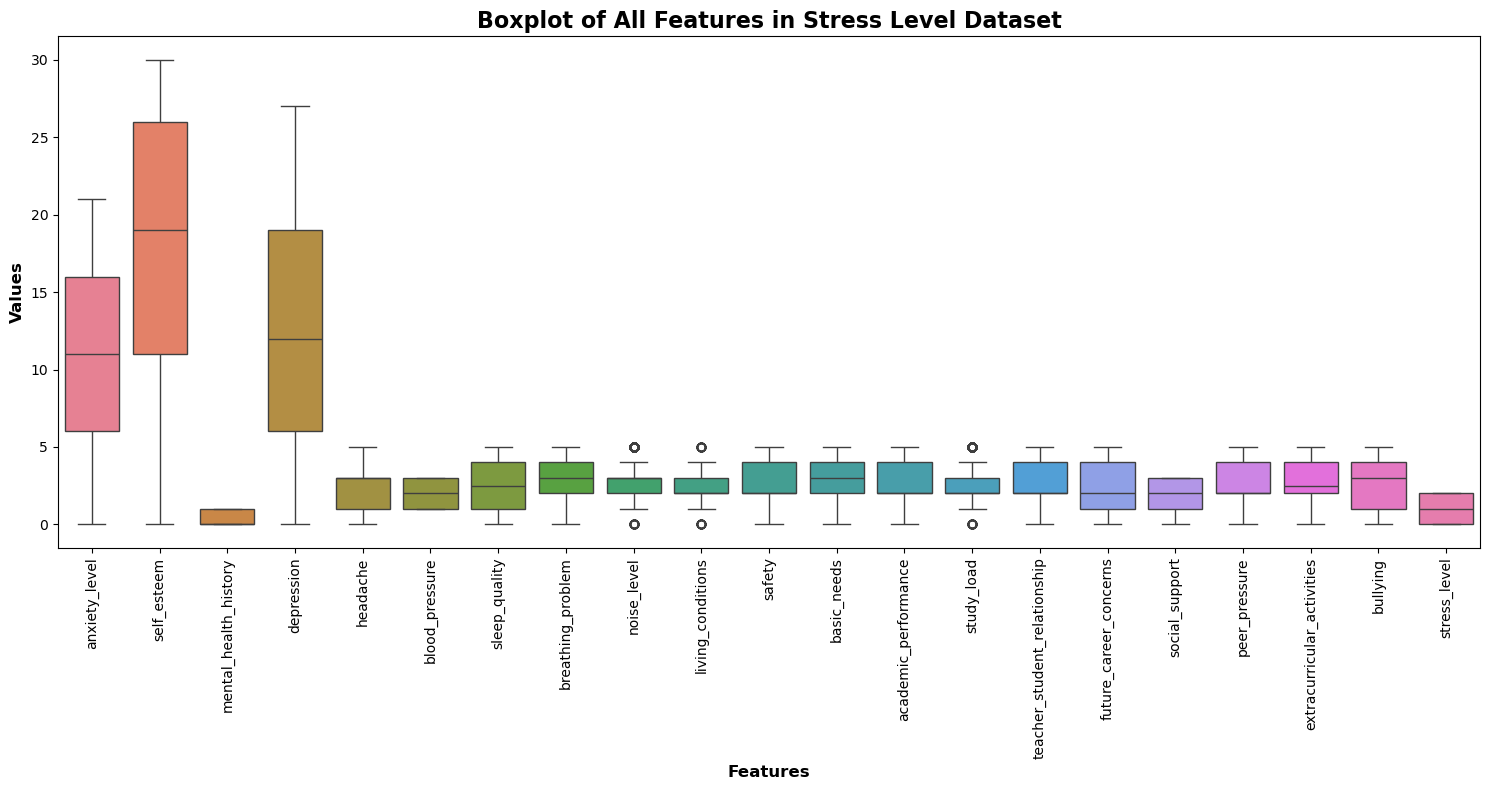

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=a)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('Boxplot of All Features in Stress Level Dataset',fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

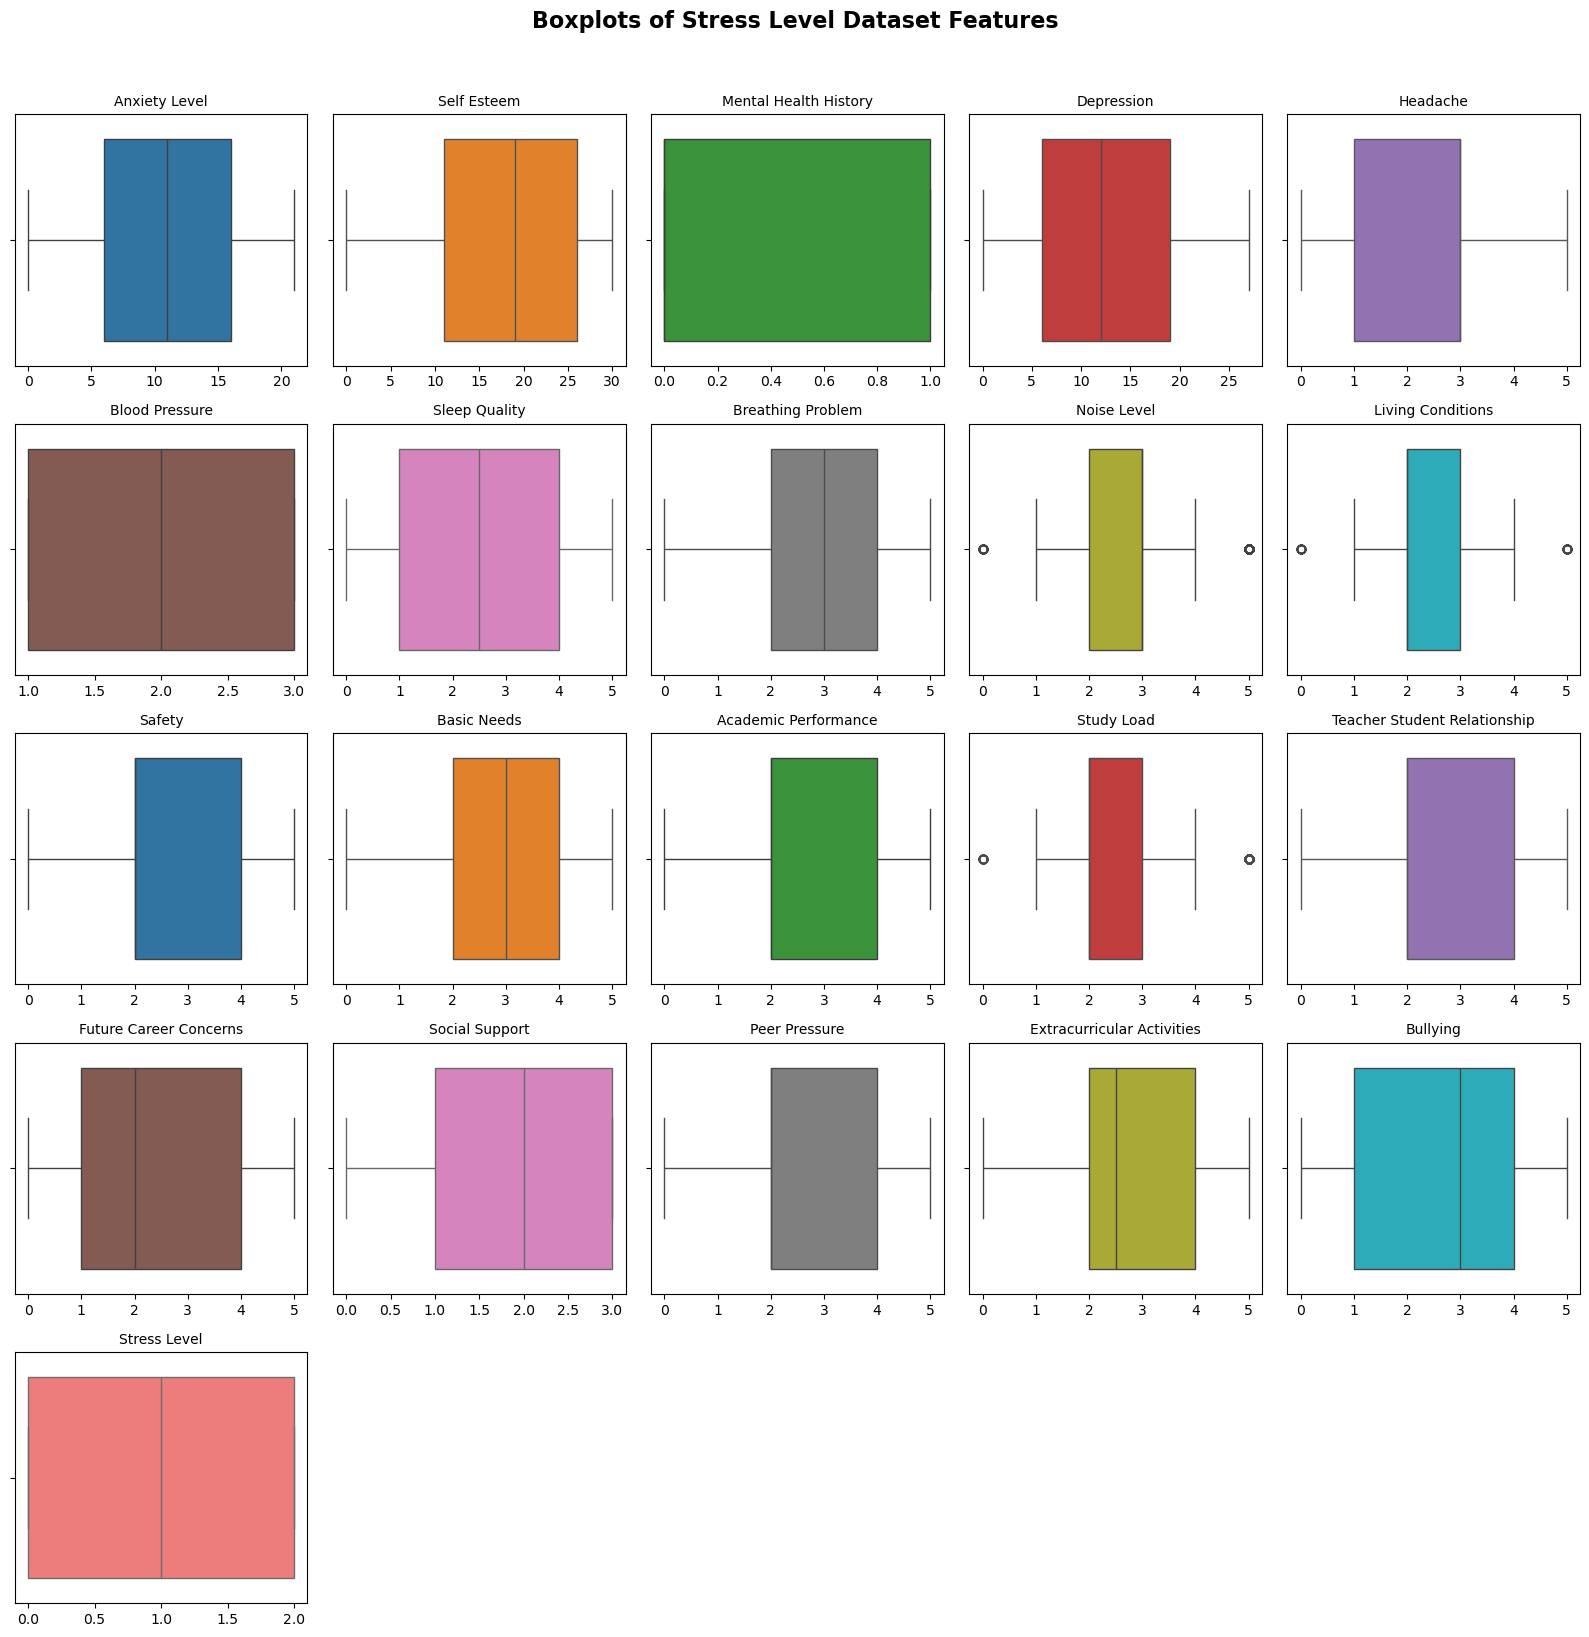

In [43]:
stress_cols = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 
               'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 
               'noise_level', 'living_conditions', 'safety', 'basic_needs', 
               'academic_performance', 'study_load', 'teacher_student_relationship', 
               'future_career_concerns', 'social_support', 'peer_pressure', 
               'extracurricular_activities', 'bullying', 'stress_level']

plt.figure(figsize=(16, 16), layout='constrained')

# Define colors based on feature categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#ff6b6b']
for i in range(len(stress_cols)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(data=a, x=stress_cols[i], color=colors[i])
    plt.title(stress_cols[i].replace('_', ' ').title(), fontsize=10)
    plt.xlabel('')

plt.suptitle('Boxplots of Stress Level Dataset Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### OUTLIER TREATING

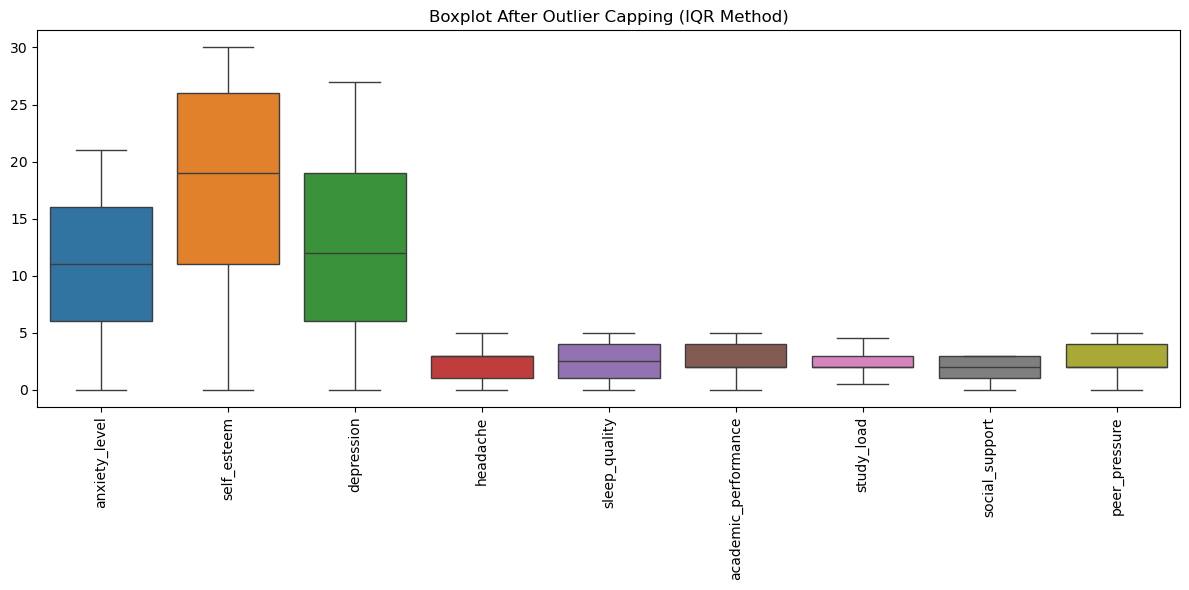

In [44]:
stress_features = ['anxiety_level', 'self_esteem', 'depression', 'headache', 
                   'sleep_quality', 'academic_performance', 'study_load', 
                   'social_support', 'peer_pressure']

for i in stress_features:
    Q1 = a[i].quantile(0.25)                                 
    Q3 = a[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap outliers
    a.loc[(a[i] >= upper_limit), i] = upper_limit
    a.loc[(a[i] <= lower_limit), i] = lower_limit

# Visualize after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=a[stress_features])
plt.xticks(rotation=90)
plt.title('Boxplot After Outlier Capping (IQR Method)')
plt.tight_layout()
plt.show()

In [49]:
print("Dataset info:")
print(a.info())
print("\nFirst few rows of stress_level:")
print(a['stress_level'].head(20))

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   anxiety_level                 1100 non-null   int64   
 1   self_esteem                   1100 non-null   float64 
 2   mental_health_history         1100 non-null   int64   
 3   depression                    1100 non-null   float64 
 4   headache                      1100 non-null   int64   
 5   blood_pressure                1100 non-null   int64   
 6   sleep_quality                 1100 non-null   float64 
 7   breathing_problem             1100 non-null   int64   
 8   noise_level                   1100 non-null   int64   
 9   living_conditions             1100 non-null   int64   
 10  safety                        1100 non-null   int64   
 11  basic_needs                   1100 non-null   int64   
 12  academic_performance          1100

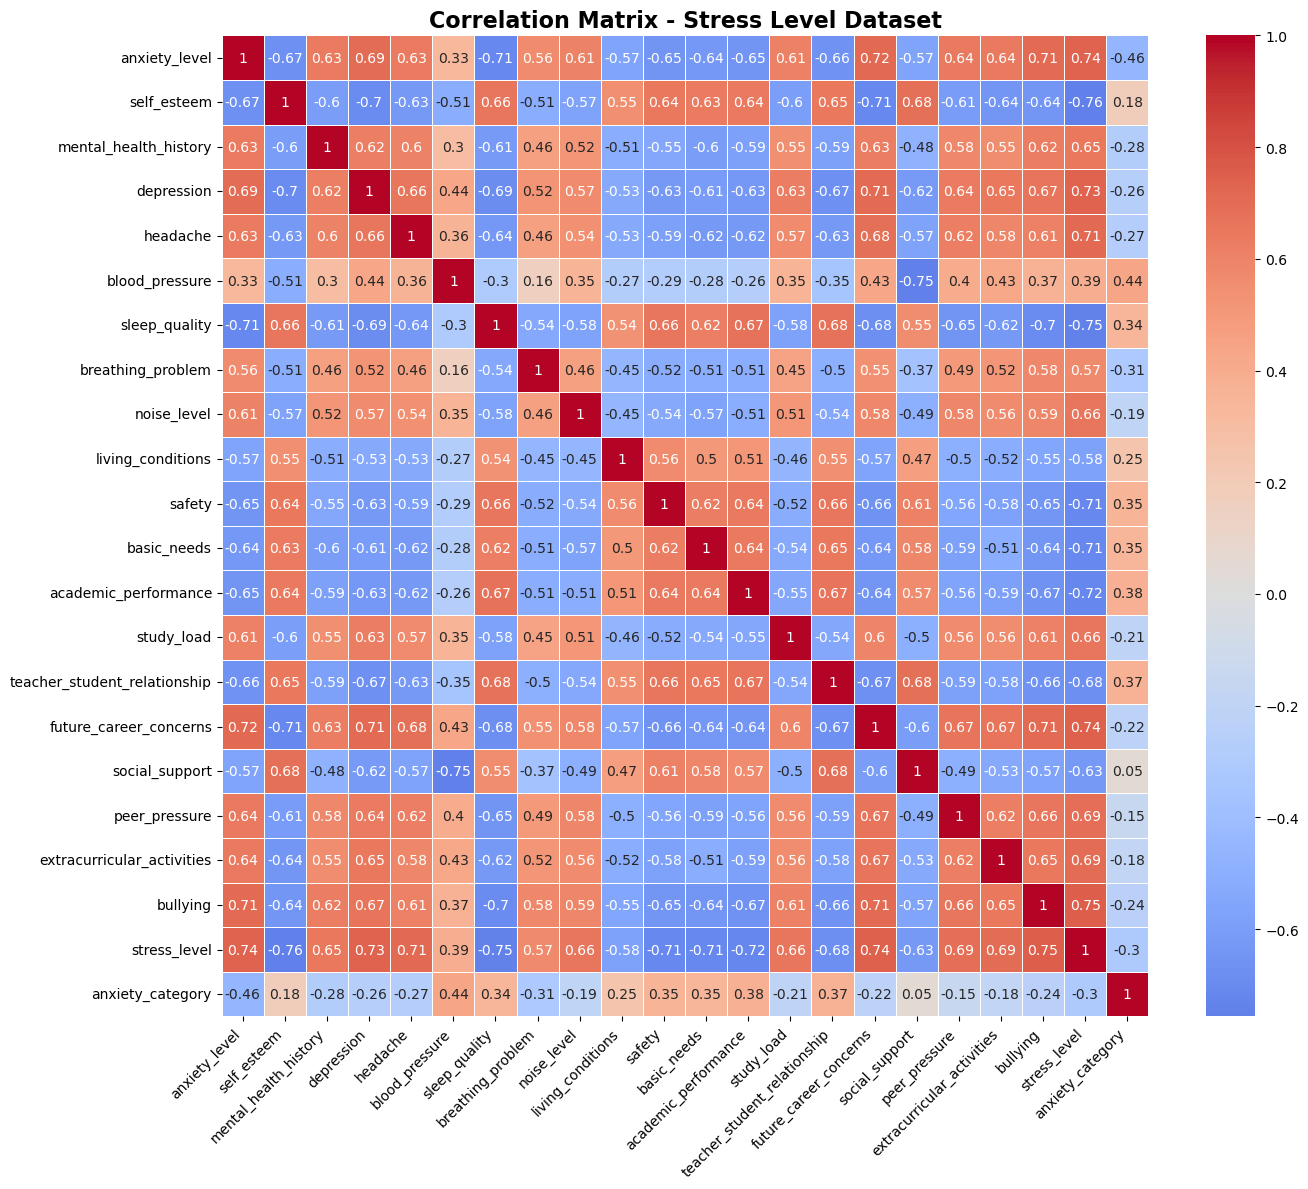

In [52]:
# Convert the category column to numeric
a['anxiety_category'] = pd.factorize(a['anxiety_category'])[0]

# Now calculate correlation
plt.figure(figsize=(14, 12))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Stress Level Dataset', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### SPLITTING THE DATA

In [53]:
x = a.drop(['stress_level'], axis=1)
y = a['stress_level']
print(x)
print(y)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14         20.0                      0        11.0         2   
1                15          8.0                      1        15.0         5   
2                12         18.0                      1        14.0         2   
3                16         12.0                      1        15.0         4   
4                16         28.0                      0         7.0         2   
...             ...          ...                    ...         ...       ...   
1095             11         17.0                      0        14.0         3   
1096              9         12.0                      0         8.0         0   
1097              4         26.0                      0         3.0         1   
1098             21          0.0                      1        19.0         5   
1099             18          6.0                      1        15.0         3   

      blood_pressure  sleep

In [61]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Initialize scaler
scaler = MinMaxScaler()

# Fit on training data and transform both
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f"Training set shape: x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: x_test: {x_test.shape}, y_test: {y_test.shape}")
print(f"\nTraining samples: {len(x_train)} ({len(x_train)/(len(x_train)+len(x_test))*100:.1f}%)")
print(f"Testing samples: {len(x_test)} ({len(x_test)/(len(x_train)+len(x_test))*100:.1f}%)")

Training set shape: x_train: (770, 21), y_train: (770,)
Testing set shape: x_test: (330, 21), y_test: (330,)

Training samples: 770 (70.0%)
Testing samples: 330 (30.0%)


### LOGISTIC REGRESSION

In [62]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_test = log.predict(x_test)
y_pred_train = log.predict(x_train)

In [63]:
print('test_acc:',log.score(x_test,y_test))
print('train_acc:',log.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

test_acc: 0.8757575757575757
train_acc: 0.9077922077922078
[[96  6 14]
 [ 1 98  9]
 [ 7  4 95]]
CR:               precision    recall  f1-score   support

           0       0.92      0.83      0.87       116
           1       0.91      0.91      0.91       108
           2       0.81      0.90      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [64]:
log_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy_score:",log_acc) 

accuracy_score: 87.57575757575758


### DECISION TREE

In [65]:
dt=DecisionTreeClassifier(max_depth=9)
dt.fit(x_train,y_train)
y_pred_test=dt.predict(x_test)
y_pred_train=dt.predict(x_train) 

In [66]:
print('test_acc:',dt.score(x_test,y_test))
print('train_acc:',dt.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

test_acc: 0.8363636363636363
train_acc: 0.9857142857142858
[[91 11 14]
 [ 3 98  7]
 [ 7 12 87]]
CR:               precision    recall  f1-score   support

           0       0.90      0.78      0.84       116
           1       0.81      0.91      0.86       108
           2       0.81      0.82      0.81       106

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [69]:
dt_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",dt_acc) 

accuracy score: 83.63636363636363


### RANDOM FOREST

In [70]:
rf=RandomForestClassifier(n_estimators=50,random_state=20)
rf.fit(x_train,y_train)
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [71]:
print('test_acc:',rf.score(x_test,y_test))
print('train_acc:',rf.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

test_acc: 0.8696969696969697
train_acc: 1.0
[[95 11 10]
 [ 2 99  7]
 [ 5  8 93]]
CR:               precision    recall  f1-score   support

           0       0.93      0.82      0.87       116
           1       0.84      0.92      0.88       108
           2       0.85      0.88      0.86       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



In [72]:
rf_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",rf_acc)

accuracy score: 86.96969696969697


### ADABOOST

In [73]:
adb=AdaBoostClassifier(n_estimators=100,learning_rate=0.2,random_state=25)
adb.fit(x_train,y_train)
y_pred_test=adb.predict(x_test)
y_pred_train=adb.predict(x_train)

In [74]:
print('test_acc:',adb.score(x_test,y_test))
print('train_acc:',adb.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

test_acc: 0.8575757575757575
train_acc: 0.9064935064935065
[[90 10 16]
 [ 2 97  9]
 [ 6  4 96]]
CR:               precision    recall  f1-score   support

           0       0.92      0.78      0.84       116
           1       0.87      0.90      0.89       108
           2       0.79      0.91      0.85       106

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



In [76]:
adb_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",adb_acc)

accuracy score: 85.75757575757575


### GRADIENT BOOST

In [78]:
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.05,random_state=5)        
gbc.fit(x_train,y_train)
y_pred_test=gbc.predict(x_test)
y_pred_train=gbc.predict(x_train)

In [79]:
print('test_acc:',gbc.score(x_test,y_test))
print('train_acc:',gbc.score(x_train,y_train))
print('CR:',classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

test_acc: 0.8696969696969697
train_acc: 0.9766233766233766
CR:               precision    recall  f1-score   support

           0       0.92      0.82      0.87       116
           1       0.85      0.92      0.88       108
           2       0.84      0.88      0.86       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

[[95 11 10]
 [ 1 99  8]
 [ 7  6 93]]


In [81]:
gbc_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",gbc_acc)

accuracy score: 86.96969696969697


### XG BOOST

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_test=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)

In [88]:
print('test_acc:',xgb.score(x_test,y_test))
print('train_acc:',xgb.score(x_train,y_train))
print('CR:',classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

test_acc: 0.8636363636363636
train_acc: 1.0
CR:               precision    recall  f1-score   support

           0       0.93      0.81      0.87       116
           1       0.85      0.92      0.88       108
           2       0.82      0.87      0.84       106

    accuracy                           0.86       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330

[[94 11 11]
 [ 0 99  9]
 [ 7  7 92]]


In [89]:
xgb_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",xgb_acc)

accuracy score: 86.36363636363636


### K NEAREST NEIGHBOR(KNN)

In [90]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [91]:
print('test_acc:',knn.score(x_test,y_test))
print('train_acc:',knn.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

test_acc: 0.8787878787878788
train_acc: 0.9285714285714286
[[101   3  12]
 [  4  99   5]
 [  9   7  90]]
CR:               precision    recall  f1-score   support

           0       0.89      0.87      0.88       116
           1       0.91      0.92      0.91       108
           2       0.84      0.85      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [93]:
knn_acc=accuracy_score(y_test,y_pred_test)*100
print('accuracy score:',knn_acc)

accuracy score: 87.87878787878788


### SUPPORT VECTOR MACHINE

In [94]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)
print('test_acc',svc.score(x_test,y_test))
print('train_acc:',svc.score(x_train,y_train))
print('CM:',confusion_matrix(y_test,y_pred_test))
print('CR:',classification_report(y_test,y_pred_test))
svc_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",svc_acc)

test_acc 0.8696969696969697
train_acc: 0.9207792207792208
CM: [[93 11 12]
 [ 1 99  8]
 [ 7  4 95]]
CR:               precision    recall  f1-score   support

           0       0.92      0.80      0.86       116
           1       0.87      0.92      0.89       108
           2       0.83      0.90      0.86       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

accuracy score: 86.96969696969697


In [95]:
poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
poly.fit(x_train,y_train)
y_pred_test=poly.predict(x_test)
y_pred_train=poly.predict(x_train)
print('test_acc',poly.score(x_test,y_test))
print('test_acc:',poly.score(x_train,y_train))
print('CM:',confusion_matrix(y_test,y_pred_test))
print('CR:',classification_report(y_test,y_pred_test))
pa_acc=accuracy_score(y_test,y_pred_test)*100
print("accuracy score:",pa_acc)

test_acc 0.8757575757575757
test_acc: 1.0
CM: [[100   6  10]
 [  3  99   6]
 [  9   7  90]]
CR:               precision    recall  f1-score   support

           0       0.89      0.86      0.88       116
           1       0.88      0.92      0.90       108
           2       0.85      0.85      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score: 87.57575757575758


In [96]:
model2=SVC(kernel="sigmoid",gamma=10,C=5)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
y_pred1=model2.predict(x_train)
print('test_acc',model2.score(x_test,y_test))
print('test_acc:',model2.score(x_train,y_train))
print('CM:',confusion_matrix(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
sca=accuracy_score(y_test,y_pred)*100
print("accuracy score:",sca)

test_acc 0.3212121212121212
test_acc: 0.34155844155844156
CM: [[  0   0 116]
 [  0   0 108]
 [  0   0 106]]
CR:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       108
           2       0.32      1.00      0.49       106

    accuracy                           0.32       330
   macro avg       0.11      0.33      0.16       330
weighted avg       0.10      0.32      0.16       330

accuracy score: 32.121212121212125


In [97]:
rbf=SVC()
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
print('Test accuracy:',rbf.score(x_test,y_test))
print('train accuracy:',rbf.score(x_train,y_train))
print('CM:',confusion_matrix(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ra=accuracy_score(y_test,y_pred)*100
print("accuracy score:",ra)


Test accuracy: 0.8787878787878788
train accuracy: 0.987012987012987
CM: [[ 98  10   8]
 [  0 100   8]
 [  8   6  92]]
CR:               precision    recall  f1-score   support

           0       0.92      0.84      0.88       116
           1       0.86      0.93      0.89       108
           2       0.85      0.87      0.86       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score: 87.87878787878788


### NAIVE BAYES (GaussianNB)

In [98]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
cm=confusion_matrix(y_test,y_preds)
print(cm)
print('CR:',classification_report(y_test,y_preds))
nb_acc=accuracy_score(y_test,y_preds)*100
print("accuracy score:",nb_acc)

Test accuracy: 0.8575757575757575
train accuracy: 0.8909090909090909
[[88  2 26]
 [ 1 96 11]
 [ 3  4 99]]
CR:               precision    recall  f1-score   support

           0       0.96      0.76      0.85       116
           1       0.94      0.89      0.91       108
           2       0.73      0.93      0.82       106

    accuracy                           0.86       330
   macro avg       0.88      0.86      0.86       330
weighted avg       0.88      0.86      0.86       330

accuracy score: 85.75757575757575


### ACCURACY OF MODELS

In [99]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','log','gb','rf','adb','gbc','dt','svc','xgb'])
tb['accuracy']=pd.Series([knn_acc,log_acc,nb_acc,rf_acc,adb_acc,gbc_acc,dt_acc,svc_acc,xgb_acc])
tb

,model,accuracy
0,knn,87.878788
1,log,87.575758
2,gb,85.757576
3,rf,86.969697
4,adb,85.757576
5,gbc,86.969697
6,dt,83.636364
7,svc,86.969697
8,xgb,86.363636


### OVER SAMPLING

In [100]:
a['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE      # synthetic minority oversampling technique
over=SMOTE(random_state=5)
x_ov,y_ov=over.fit_resample(x,y)
y_ov.value_counts() 

stress_level
1    373
2    373
0    373
Name: count, dtype: int64

In [102]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_test=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))
knno=accuracy_score(y_test,y_pred)*100
print('accuracy score',knno)

Test accuracy: 0.8787878787878788
train accuracy: 0.9285714285714286
[[101   3  12]
 [  4  99   5]
 [  9   7  90]]
CR:               precision    recall  f1-score   support

           0       0.89      0.87      0.88       116
           1       0.91      0.92      0.91       108
           2       0.84      0.85      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score 87.87878787878788


In [103]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_test=lr.predict(x_test)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))
lro=accuracy_score(y_test,y_pred_test)*100
print('accuracy score',lro)

Test accuracy: 0.8757575757575757
train accuracy: 0.9077922077922078
[[96  6 14]
 [ 1 98  9]
 [ 7  4 95]]
CR:               precision    recall  f1-score   support

           0       0.92      0.83      0.87       116
           1       0.91      0.91      0.91       108
           2       0.81      0.90      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score 87.57575757575758


In [104]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
cm=confusion_matrix(y_test,y_preds)
print(cm)
print('CR:',classification_report(y_test,y_preds))
nbo=accuracy_score(y_test,y_preds)*100
print('accuracy score',nbo)

Test accuracy: 0.8575757575757575
train accuracy: 0.8909090909090909
[[88  2 26]
 [ 1 96 11]
 [ 3  4 99]]
CR:               precision    recall  f1-score   support

           0       0.96      0.76      0.85       116
           1       0.94      0.89      0.91       108
           2       0.73      0.93      0.82       106

    accuracy                           0.86       330
   macro avg       0.88      0.86      0.86       330
weighted avg       0.88      0.86      0.86       330

accuracy score 85.75757575757575


In [105]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred1)
print(cm)
print('CR:',classification_report(y_test,y_pred1))
rfo=accuracy_score(y_test,y_pred1)*100
print('accuracy score',rfo)

Test accuracy: 0.8848484848484849
train accuracy: 0.9922077922077922
[[103   6   7]
 [  2 100   6]
 [ 14   3  89]]
CR:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       116
           1       0.92      0.93      0.92       108
           2       0.87      0.84      0.86       106

    accuracy                           0.88       330
   macro avg       0.89      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score 88.48484848484848


In [106]:

adb=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adb.fit(x_train,y_train)
y_preds=adb.predict(x_test)
print('Test accuracy:',adb.score(x_test,y_test))
print('train accuracy:',adb.score(x_train,y_train))
cm=confusion_matrix(y_test,y_preds)
print(cm)
print('CR:',classification_report(y_test,y_preds))
adbo=accuracy_score(y_test,y_preds)*100
print('accuracy score',adbo)

Test accuracy: 0.8727272727272727
train accuracy: 0.8948051948051948
[[99  0 17]
 [ 3 95 10]
 [12  0 94]]
CR:               precision    recall  f1-score   support

           0       0.87      0.85      0.86       116
           1       1.00      0.88      0.94       108
           2       0.78      0.89      0.83       106

    accuracy                           0.87       330
   macro avg       0.88      0.87      0.88       330
weighted avg       0.88      0.87      0.87       330

accuracy score 87.27272727272727


In [107]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
cm=confusion_matrix(y_test,y_preds)
print(cm)
print('CR:',classification_report(y_test,y_preds))
gbco=accuracy_score(y_test,y_preds)*100
print('accuracy score',gbco)

Test accuracy: 0.8575757575757575
train accuracy: 0.9961038961038962
[[94 15  7]
 [ 2 98  8]
 [ 6  9 91]]
CR:               precision    recall  f1-score   support

           0       0.92      0.81      0.86       116
           1       0.80      0.91      0.85       108
           2       0.86      0.86      0.86       106

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330

accuracy score 85.75757575757575


In [108]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_predd=xg.predict(x_test)
print('Test accuracy:',xg.score(x_test,y_test))
print('train accuracy:',xg.score(x_train,y_train))
cm=confusion_matrix(y_test,y_predd)
print(cm)
print('CR:',classification_report(y_test,y_predd))
xgo=accuracy_score(y_test,y_predd)*100
print("accuracy score:",xgo)

Test accuracy: 0.8636363636363636
train accuracy: 1.0
[[94 11 11]
 [ 0 99  9]
 [ 7  7 92]]
CR:               precision    recall  f1-score   support

           0       0.93      0.81      0.87       116
           1       0.85      0.92      0.88       108
           2       0.82      0.87      0.84       106

    accuracy                           0.86       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330

accuracy score: 86.36363636363636


In [109]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_preds=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
cm=confusion_matrix(y_test,y_preds)
print(cm)
print('CR:',classification_report(y_test,y_preds))
dto=accuracy_score(y_test,y_preds)*100
print('accuracy score',dto)

Test accuracy: 0.8515151515151516
train accuracy: 1.0
[[94 11 11]
 [ 2 97  9]
 [ 8  8 90]]
CR:               precision    recall  f1-score   support

           0       0.90      0.81      0.85       116
           1       0.84      0.90      0.87       108
           2       0.82      0.85      0.83       106

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330

accuracy score 85.15151515151516


In [110]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Test accuracy:',svc.score(x_test,y_test))
print('train accuracy:',svc.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('CR:',classification_report(y_test,y_pred))
so=accuracy_score(y_test,y_pred)*100
print("accuracy score:",so)

Test accuracy: 0.8696969696969697
train accuracy: 0.9207792207792208
[[93 11 12]
 [ 1 99  8]
 [ 7  4 95]]
CR:               precision    recall  f1-score   support

           0       0.92      0.80      0.86       116
           1       0.87      0.92      0.89       108
           2       0.83      0.90      0.86       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

accuracy score: 86.96969696969697


In [111]:
poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
poly.fit(x_train,y_train)
y_pred1=poly.predict(x_test)
print('Test accuracy:',poly.score(x_test,y_test))
print('train accuracy:',poly.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred1)
print(cm)
print('CR:',classification_report(y_test,y_pred1))
po=accuracy_score(y_test,y_pred1)*100
print("accuracy score:",po)

Test accuracy: 0.8757575757575757
train accuracy: 1.0
[[100   6  10]
 [  3  99   6]
 [  9   7  90]]
CR:               precision    recall  f1-score   support

           0       0.89      0.86      0.88       116
           1       0.88      0.92      0.90       108
           2       0.85      0.85      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score: 87.57575757575758


In [112]:
model2=SVC(kernel="sigmoid",gamma=10,C=5)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print('Test accuracy:',model2.score(x_test,y_test))
print('train accuracy:',model2.score(x_train,y_train))
cm=confusion_matrix(y_test,y_pred2)
print(cm)
print('CR:',classification_report(y_test,y_pred2))
sco=accuracy_score(y_test,y_pred2)*100
print("accuracy score:",sco)

Test accuracy: 0.3212121212121212
train accuracy: 0.34155844155844156
[[  0   0 116]
 [  0   0 108]
 [  0   0 106]]
CR:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       108
           2       0.32      1.00      0.49       106

    accuracy                           0.32       330
   macro avg       0.11      0.33      0.16       330
weighted avg       0.10      0.32      0.16       330

accuracy score: 32.121212121212125


In [113]:
rbf=SVC()
rbf.fit(x_train,y_train)
y_pred3=rbf.predict(x_test)
print('Test accuracy:',rbf.score(x_test,y_test))
print('train accuracy:',rbf.score(x_train,y_train))
c=confusion_matrix(y_test,y_pred3)
print(c)
print('CR:',classification_report(y_test,y_pred3))
ro=accuracy_score(y_test,y_pred3)*100
print("accuracy score:",ro)


Test accuracy: 0.8787878787878788
train accuracy: 0.987012987012987
[[ 98  10   8]
 [  0 100   8]
 [  8   6  92]]
CR:               precision    recall  f1-score   support

           0       0.92      0.84      0.88       116
           1       0.86      0.93      0.89       108
           2       0.85      0.87      0.86       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

accuracy score: 87.87878787878788


### ACCURACY AFTER OVER SAMPLING

In [114]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','log','gb','rf','adb','gbc','dt','svc','xgb'])
tb['accuracy']=pd.Series([knn_acc,log_acc,nb_acc,rf_acc,adb_acc,gbc_acc,dt_acc,svc_acc,xgb_acc])
tb['Accuracy_oversampling']=pd.Series([knno,lro,nbo,rfo,adbo,gbco,dto,so,xgo])
tb

,model,accuracy,Accuracy_oversampling
0,knn,87.878788,87.878788
1,log,87.575758,87.575758
2,gb,85.757576,85.757576
3,rf,86.969697,88.484848
4,adb,85.757576,87.272727
5,gbc,86.969697,85.757576
6,dt,83.636364,85.151515
7,svc,86.969697,86.969697
8,xgb,86.363636,86.363636


### HYPER PARAMETER TUNING

##### KNN

In [115]:
par={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}
knt=GridSearchCV(knn,par,cv=10,scoring='accuracy')
knt.fit(x_train,y_train)
print(knt.best_params_)
print(knt.best_score_) 

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}
0.8922077922077923


In [116]:
knn=KNeighborsClassifier(n_neighbors=59,algorithm='auto',weights='distance')
knn.fit(x_train,y_train)

print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))

y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

knnt=accuracy_score(y_test,y_pred_test)*100
knntt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',knnt)
print('accuracy score of train:',knntt)

Test accuracy: 0.8606060606060606
train accuracy: 1.0
accuracy score of test: 86.06060606060606
accuracy score of train: 100.0


In [117]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[ 90   7  19]
 [  1 100   7]
 [  4   8  94]]
CR:               precision    recall  f1-score   support

           0       0.95      0.78      0.85       116
           1       0.87      0.93      0.90       108
           2       0.78      0.89      0.83       106

    accuracy                           0.86       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330



##### LR

In [118]:
par={'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','lbfgs','saga']}
lrt=GridSearchCV(lr,par,cv=10,scoring='accuracy')
lrt.fit(x_train,y_train)
print(lrt.best_params_)
print(lrt.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8948051948051947


In [119]:
log=LogisticRegression(C=100,penalty='l1',solver='saga')
log.fit(x_train,y_train)

print('Test accuracy:',log.score(x_test,y_test))
print('train accuracy:',log.score(x_train,y_train))

y_pred_test=log.predict(x_test)
y_pred_train=log.predict(x_train)


lrt=accuracy_score(y_test,y_pred_test)*100
lrtt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',lrt)
print('accuracy score of train:',lrtt)

Test accuracy: 0.8818181818181818
train accuracy: 0.9155844155844156
accuracy score of test: 88.18181818181819
accuracy score of train: 91.55844155844156


In [120]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[97  8 11]
 [ 0 99  9]
 [ 5  6 95]]
CR:               precision    recall  f1-score   support

           0       0.95      0.84      0.89       116
           1       0.88      0.92      0.90       108
           2       0.83      0.90      0.86       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.89      0.88      0.88       330



#### NB

In [121]:
par={'var_smoothing':[1e-9,1e-8,1e-7]}
nbt=GridSearchCV(gb,par,cv=10,scoring='accuracy')
nbt.fit(x_train,y_train)
print(nbt.best_params_)
print(nbt.best_score_)

{'var_smoothing': 1e-09}
0.8883116883116882


In [122]:
gb=GaussianNB(var_smoothing=1e-09)
gb.fit(x_train,y_train)

print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))

y_pred_test=gb.predict(x_test)
y_pred_train=gb.predict(x_train)

nbt=accuracy_score(y_test,y_pred_test)*100
nbtt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',nbt)
print('accuracy score of train:',nbtt)

Test accuracy: 0.8575757575757575
train accuracy: 0.8909090909090909
accuracy score of test: 85.75757575757575
accuracy score of train: 89.0909090909091


In [123]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[88  2 26]
 [ 1 96 11]
 [ 3  4 99]]
CR:               precision    recall  f1-score   support

           0       0.96      0.76      0.85       116
           1       0.94      0.89      0.91       108
           2       0.73      0.93      0.82       106

    accuracy                           0.86       330
   macro avg       0.88      0.86      0.86       330
weighted avg       0.88      0.86      0.86       330



In [124]:
par={'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']}
rft=GridSearchCV(rf,par,cv=10,scoring='accuracy')
rft.fit(x_train,y_train)                                            # how many features model consider at each step when building individual trees
print(rft.best_params_)
print(rft.best_score_)

{'max_depth': 20, 'max_features': 'sqrt'}
0.8779220779220779


In [125]:
rf=RandomForestClassifier(max_depth=30,max_features='sqrt')
rf.fit(x_train,y_train)

print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))

y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

rft=accuracy_score(y_test,y_pred_test)*100
rftt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',rft)
print('accuracy score of train:',rftt)


Test accuracy: 0.8696969696969697
train accuracy: 1.0
accuracy score of test: 86.96969696969697
accuracy score of train: 100.0


In [126]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[ 94  10  12]
 [  0 101   7]
 [  6   8  92]]
CR:               precision    recall  f1-score   support

           0       0.94      0.81      0.87       116
           1       0.85      0.94      0.89       108
           2       0.83      0.87      0.85       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



#### ADB

In [127]:
par={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0]}
adt=GridSearchCV(adb,par,cv=10,scoring='accuracy')
adt.fit(x_train,y_train)
print(adt.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}


In [128]:
adb=AdaBoostClassifier(n_estimators=100,learning_rate=0.01)
adb.fit(x_train,y_train)

print('Test accuracy:',adb.score(x_test,y_test))
print('train accuracy:',adb.score(x_train,y_train))

y_pred_test=adb.predict(x_test)
y_pred_train=adb.predict(x_train)

adt=accuracy_score(y_test,y_pred_test)*100
adtt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',adt)
print('accuracy score of train:',adtt)


Test accuracy: 0.8666666666666667
train accuracy: 0.8909090909090909
accuracy score of test: 86.66666666666667
accuracy score of train: 89.0909090909091


In [129]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[94  0 22]
 [ 2 95 11]
 [ 9  0 97]]
CR:               precision    recall  f1-score   support

           0       0.90      0.81      0.85       116
           1       1.00      0.88      0.94       108
           2       0.75      0.92      0.82       106

    accuracy                           0.87       330
   macro avg       0.88      0.87      0.87       330
weighted avg       0.88      0.87      0.87       330



In [130]:
gscv=GridSearchCV(svc,{"gamma":["auto","scale"],"C":[1,5,10,20],
                             "kernel":["linear","rbf","poly","sigmoid"]},
                  cv=5,return_train_score=True)
gscv.fit(x_train,y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}
0.8922077922077923


In [131]:
svc=SVC(C=20,gamma="auto",kernel="linear")
svc.fit(x_train,y_train)

print('Test accuracy:',svc.score(x_test,y_test))
print('train accuracy:',svc.score(x_train,y_train))

y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

svct=accuracy_score(y_test,y_pred_test)*100
svctt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',svct)
print('accuracy score of train:',svctt)



Test accuracy: 0.8848484848484849
train accuracy: 0.925974025974026
accuracy score of test: 88.48484848484848
accuracy score of train: 92.5974025974026


In [132]:
c=confusion_matrix(y_test,y_pred_test)
print(c)
print('CR:',classification_report(y_test,y_pred_test))

[[ 94  10  12]
 [  1 100   7]
 [  3   5  98]]
CR:               precision    recall  f1-score   support

           0       0.96      0.81      0.88       116
           1       0.87      0.93      0.90       108
           2       0.84      0.92      0.88       106

    accuracy                           0.88       330
   macro avg       0.89      0.89      0.88       330
weighted avg       0.89      0.88      0.88       330



#### GBC

In [133]:
par={'n_estimators':[100,200],'max_depth':[3,4,5]}
gbt=GridSearchCV(gbc,par,cv=10,scoring='accuracy')
gbt.fit(x_train,y_train)
print(gbt.best_params_)
print(gbt.best_score_)

{'max_depth': 4, 'n_estimators': 200}
0.887012987012987


In [134]:
gbc=GradientBoostingClassifier(n_estimators=200,max_depth=5)
gbc.fit(x_train,y_train)

print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))

y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

gbt=accuracy_score(y_test,y_pred_test)*100
gbtt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',gbt)
print('accuracy score of train:',gbtt)




Test accuracy: 0.8727272727272727
train accuracy: 1.0
accuracy score of test: 88.48484848484848
accuracy score of train: 92.5974025974026


In [135]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[ 94  10  12]
 [  1 100   7]
 [  3   5  98]]
CR:               precision    recall  f1-score   support

           0       0.96      0.81      0.88       116
           1       0.87      0.93      0.90       108
           2       0.84      0.92      0.88       106

    accuracy                           0.88       330
   macro avg       0.89      0.89      0.88       330
weighted avg       0.89      0.88      0.88       330



<Axes: >

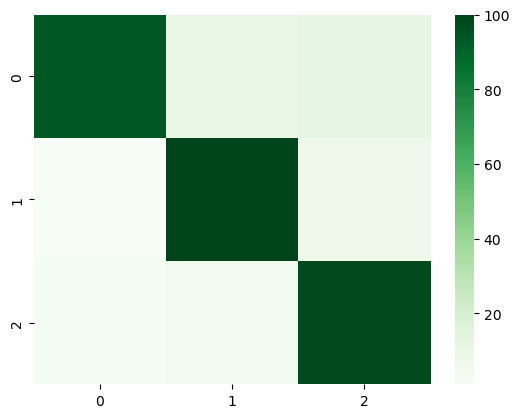

In [136]:
sns.heatmap(cm,cmap='Greens')

#### DT

In [137]:
par={'max_depth':[3,5,10],'criterion':['gini','entropy']}
dtt=GridSearchCV(dt,par,cv=10,scoring='accuracy')
dtt.fit(x_train,y_train)                                       # train the model using GSS CV
print(dtt.best_params_)

{'criterion': 'entropy', 'max_depth': 5}


In [138]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5)
dt.fit(x_train,y_train)

print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))

y_pred_test=dt.predict(x_test)
y_pred_train=dt.predict(x_train)


dtt=accuracy_score(y_test,y_pred_test)*100
dttt=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',dtt)
print('accuracy score of train:',dttt)

Test accuracy: 0.8787878787878788
train accuracy: 0.9376623376623376
accuracy score of test: 87.87878787878788
accuracy score of train: 93.76623376623377


In [139]:
c=confusion_matrix(y_test,y_pred_test)
print(c)
print('CR:',classification_report(y_test,y_pred_test))

[[105   2   9]
 [  6  96   6]
 [ 14   3  89]]
CR:               precision    recall  f1-score   support

           0       0.84      0.91      0.87       116
           1       0.95      0.89      0.92       108
           2       0.86      0.84      0.85       106

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



#### XGB

In [141]:
param={"max_depth":[3,6,10],"learning_rate":[0.01,0.1,0.3],"n_estimators":[100,200],"subsample":[0.7,1],"colsample_bytree":[0.7,1]}
xgt=GridSearchCV(xg,param,cv=10,scoring="accuracy")         # evaluate model based on accuracy
xgt.fit(x_train,y_train)
print(xgt.best_params_)
print(xgt.best_score_) 

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
0.8922077922077921


In [142]:
xg=XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=100,subsample=0.7,colsample_bytree=1)
xg.fit(x_train,y_train)

print('Test accuracy:',xg.score(x_test,y_test))
print('train accuracy:',xg.score(x_train,y_train))

y_pred_test=xg.predict(x_test)
y_pred_train=xg.predict(x_train)

xga=accuracy_score(y_test,y_pred_test)*100
xgat=accuracy_score(y_train,y_pred_train)*100

print('accuracy score of test:',xga)
print('accuracy score of train:',xgat)

Test accuracy: 0.8666666666666667
train accuracy: 1.0
accuracy score of test: 86.66666666666667
accuracy score of train: 100.0


In [143]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print('CR:',classification_report(y_test,y_pred_test))

[[93 13 10]
 [ 1 98  9]
 [ 5  6 95]]
CR:               precision    recall  f1-score   support

           0       0.94      0.80      0.87       116
           1       0.84      0.91      0.87       108
           2       0.83      0.90      0.86       106

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



In [144]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','log','gb','rf','adb','gbc','dt','xgb','svc'])
tb['accuracy']=pd.Series([knn_acc,log_acc,nb_acc,rf_acc,adb_acc,gbc_acc,dt_acc,xgb_acc,svc_acc])                                
tb['Accuracy_hyperparameter']=pd.Series([knnt,lrt,nbt,rft,adt,gbt,dtt,xga,svct])  
tb

,model,accuracy,Accuracy_hyperparameter
0,knn,87.878788,86.060606
1,log,87.575758,88.181818
2,gb,85.757576,85.757576
3,rf,86.969697,86.969697
4,adb,85.757576,86.666667
5,gbc,86.969697,88.484848
6,dt,83.636364,87.878788
7,xgb,86.363636,86.666667
8,svc,86.969697,88.484848


### TEST AND TRAIN ACCURACY

In [146]:
tb1=pd.DataFrame()
tb1['model']=pd.Series(['knn','log','gb','rf','adb','gbc','dt','xgb','svc'])
tb1['Test Accuracy']=pd.Series([knnt,lrt,nbt,rft,adt,gbt,dtt,xga,svct])
tb1['Train Accuracy']=pd.Series([knntt,lrtt,nbtt,rftt,adtt,gbtt,dttt,xgat,svctt])
tb1

,model,Test Accuracy,Train Accuracy
0,knn,86.060606,100.000000
1,log,88.181818,91.558442
2,gb,85.757576,89.090909
3,rf,86.969697,100.000000
4,adb,86.666667,89.090909
5,gbc,88.484848,92.597403
6,dt,87.878788,93.766234
7,xgb,86.666667,100.000000
8,svc,88.484848,92.597403


In [149]:
import joblib
joblib.dump(gbc, "C:/Users/annal/model.pkl")

['C:/Users/annal/model.pkl']

In [150]:
joblib.dump(scaler,"C:/Users/annal/model.pkl")

['C:/Users/annal/model.pkl']

In [159]:
# Example with correct 21 stress features
v = [[
    14, 20, 0, 11,    # anxiety, self_esteem, mental_health, depression
    2, 1, 2, 4,       # headache, blood_pressure, sleep_quality, breathing
    2, 3, 3, 2,       # noise, living_conditions, safety, basic_needs
    3, 2, 3, 3,       # academic_performance, study_load, teacher_relationship, career_concerns
    2, 3, 3, 2, 1     # social_support, peer_pressure, extracurricular, bullying, anxiety_category
]]

# Scale first
v_scaled = scaler.transform(v)
result = gbc.predict(v_scaled)
print(f"Predicted stress level: {result[0]}")

Predicted stress level: 1


In [162]:
import numpy as np

def run_stress_model():
    print("=" * 50)
    print("STRESS LEVEL PREDICTION")
    print("=" * 50)
    print("\nPlease enter your information:\n")
    
    # Collect all 21 inputs (you were missing anxiety_category)
    anxiety_level = get_input('Anxiety level', 0, 21)
    self_esteem = get_input('Self-esteem', 0, 30)
    mental_health_history = get_choice_input('Mental health history', [0, 1], ['No', 'Yes'])
    depression = get_input('Depression level', 0, 27)
    
    headache = get_scale_input('Headache frequency', 1, 5)
    blood_pressure = get_scale_input('Blood pressure (1=normal, 3=high)', 1, 3)
    sleep_quality = get_scale_input('Sleep quality (1=poor, 5=excellent)', 1, 5)
    breathing_problem = get_scale_input('Breathing problems', 0, 5)
    noise_level = get_scale_input('Noise level', 0, 5)
    living_conditions = get_scale_input('Living conditions', 1, 5)
    safety = get_scale_input('Safety level', 1, 5)
    basic_needs = get_scale_input('Basic needs satisfaction', 1, 5)
    academic_performance = get_scale_input('Academic performance', 1, 5)
    study_load = get_scale_input('Study load', 1, 5)
    teacher_student_relationship = get_scale_input('Teacher-student relationship', 1, 5)
    future_career_concerns = get_scale_input('Future career concerns', 1, 5)
    social_support = get_scale_input('Social support', 1, 5)
    peer_pressure = get_scale_input('Peer pressure', 1, 5)
    extracurricular_activities = get_scale_input('Extracurricular activities', 0, 5)
    bullying = get_scale_input('Bullying experience', 0, 5)
    
    # ADD THIS MISSING FEATURE!
    anxiety_category = get_scale_input('Anxiety category', 0, 5)
    
    # Prepare features - NOW WITH 21 FEATURES
    features = np.array([[anxiety_level, self_esteem, mental_health_history, depression,
                          headache, blood_pressure, sleep_quality, breathing_problem,
                          noise_level, living_conditions, safety, basic_needs,
                          academic_performance, study_load, teacher_student_relationship, 
                          future_career_concerns, social_support, peer_pressure,
                          extracurricular_activities, bullying, anxiety_category]])  # Added anxiety_category
    
    # Scale and predict
    features_scaled = scaler.transform(features)
    result = gbc.predict(features_scaled)[0]
    
    # Display results
    print("\n" + "=" * 50)
    print("PREDICTION RESULTS")
    print("=" * 50)
    
    stress_labels = ['LOW', 'MEDIUM', 'HIGH']
    print(f"\nPredicted Stress Level: {result} ({stress_labels[result]})")
    
    # Show recommendations
    if result == 0:
        print("\n✅ You're managing stress well! Keep up the good work.")
    elif result == 1:
        print("\n⚠️  You have moderate stress. Consider stress management techniques.")
    elif result == 2:
        print("\n🚨 You have high stress levels. Please consider seeking support.")
    
    return result

# Helper functions (same as before)
def get_input(prompt, min_val, max_val):
    while True:
        try:
            value = float(input(f'{prompt} ({min_val}-{max_val}): '))
            if min_val <= value <= max_val:
                return value
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid number")

def get_scale_input(prompt, min_val, max_val):
    while True:
        try:
            value = int(input(f'{prompt} ({min_val}-{max_val}): '))
            if min_val <= value <= max_val:
                return value
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid integer")

def get_choice_input(prompt, values, labels):
    while True:
        print(f"\n{prompt}:")
        for i, label in enumerate(labels):
            print(f"  {values[i]}: {label}")
        try:
            value = int(input("Enter choice: "))
            if value in values:
                return value
            print(f"Please enter one of: {values}")
        except ValueError:
            print("Please enter a valid number")

# Run the model
run_stress_model()

STRESS LEVEL PREDICTION

Please enter your information:



Anxiety level (0-21):  1
Self-esteem (0-30):  2



Mental health history:
  0: No
  1: Yes


Enter choice:  0
Depression level (0-27):  2
Headache frequency (1-5):  1
Blood pressure (1=normal, 3=high) (1-3):  1
Sleep quality (1=poor, 5=excellent) (1-5):  1
Breathing problems (0-5):  1
Noise level (0-5):  1
Living conditions (1-5):  1
Safety level (1-5):  1
Basic needs satisfaction (1-5):  1
Academic performance (1-5):  1
Study load (1-5):  1
Teacher-student relationship (1-5):  1
Future career concerns (1-5):  1
Social support (1-5):  1
Peer pressure (1-5):  1
Extracurricular activities (0-5):  1
Bullying experience (0-5):  1
Anxiety category (0-5):  1



PREDICTION RESULTS

Predicted Stress Level: 1 (MEDIUM)

⚠️  You have moderate stress. Consider stress management techniques.


np.int64(1)